# Exercise 2: Logistic Regression

Instructions
------------
% 
This file contains code that helps you get started on the logistic regression exercise. You will need to complete the following functions 

in this exericse:

- sigmoid
- cost_function
- predict
- cost_function_reg

## Setup

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from ex2 import *

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Part 1: Plotting

We start the exercise by first plotting the data to understand the problem we are working with. Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.

In [7]:
data = np.loadtxt("./data/ex2data1.txt", delimiter=",")
X = data[:, 0:2]
y = data[:, -1]

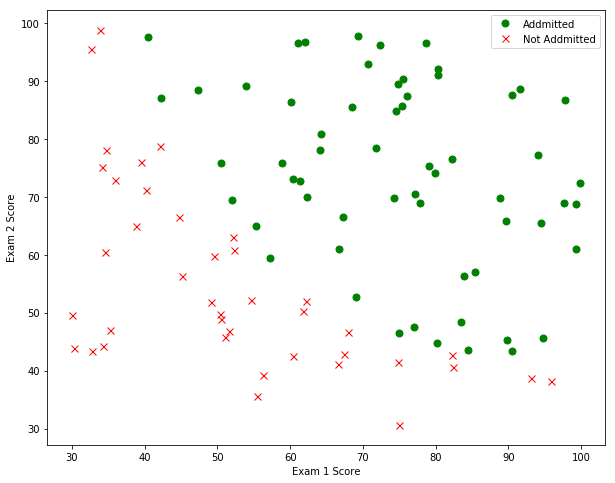

In [15]:
plot_data(X, y)
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.legend(["Addmitted", "Not Addmitted"])

## Part 2: Compute Cost and Gradient

in this part of the exercise, you will implement the cost and gradient for logistic regression

In [18]:
m, n = X.shape
X = np.c_[np.ones(m), X]

Compute and display initial cost and gradient

In [35]:
initial_theta = np.zeros((n + 1, 1))
cost = cost_function(initial_theta, X, y)
grad = gradient(initial_theta, X, y)

In [38]:
cost # Expected cost (approx): 0.693

array([0.69314718])

In [39]:
grad # Expected gradients (approx): [-0.1000, -12.0092, -11.2628]

array([[ -0.1       ],
       [-12.00921659],
       [-11.26284221]])

Compute and display cost and gradient with non-zero theta

In [53]:
test_theta = [-24, 0.2, 0.2]
cost = cost_function(test_theta, X, y)
grad = gradient(test_theta, X, y)

In [54]:
cost # Expected cost (approx): 0.218

array([[0.21833019]])

In [55]:
grad # Expected gradients (approx):[0.043, 2.566, 2.647]

array([[0.04290299],
       [2.56623412],
       [2.64679737]])

## Part 3: Optimizing using `scipy.optimize.minimize`

Note that python has no `fminunc` function, but Scipy offers an alternative `scipy.optimize.minimize`

see document here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize

In [73]:
from scipy.optimize import minimize

result = minimize(cost_function, initial_theta, args=(X, y),
                  jac=gradient, options={"disp":False})

C:\Users\q3026\Documents\GitHub\Machine-Learning-Coursera\Exercise\Jupyter-notebook\machine-learning-ex2\ex2.py:37: RuntimeWarning: divide by zero encountered in log
  J = 1 / m * (-np.dot(y.T, (np.log(sigmoid(np.dot(X, theta))))) - np.dot(1-y, np.log(1 - sigmoid(np.dot(X, theta)))))


In [ ]:
theta = np.reshape(initial_theta, ())

In [60]:
np.dot(X, initial_theta).shape

(100, 1)

In [77]:
def Sigmoid(z):
    return 1/(1 + np.exp(-z));

def Gradient(theta,x,y):
    m , n = x.shape
    theta = theta.reshape((n,1));
    y = y.reshape((m,1))
    sigmoid_x_theta = Sigmoid(x.dot(theta));
    grad = ((x.T).dot(sigmoid_x_theta-y))/m;
    return grad.flatten();

def CostFunc(theta,x,y):
    m,n = x.shape; 
    theta = theta.reshape((n,1));
    y = y.reshape((m,1));
    term1 = np.log(Sigmoid(x.dot(theta)));
    term2 = np.log(1-Sigmoid(x.dot(theta)));
    term1 = term1.reshape((m,1))
    term2 = term2.reshape((m,1))
    term = y * term1 + (1 - y) * term2;
    J = -((np.sum(term))/m);
    return J;

In [78]:
import scipy.optimize as op
m , n = X.shape;
initial_theta = np.zeros(n)
result = op.minimize(fun=CostFunc, x0=initial_theta, args=(X,y), jac=Gradient)

C:\Users\q3026\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
C:\Users\q3026\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in multiply


In [71]:
result

     fun: 0.20349770158947464
     jac: array([9.56475235e-09, 1.37863724e-07, 4.94652395e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.16131857,   0.20623159,   0.20147149])

In [84]:
np.log(sigmoid(X @ initial_theta.reshape((3,1)))).shape

(100, 1)

In [82]:
X.shape

(100, 3)

In [83]:
initial_theta.shape

(3,)